# DAIgnosis: Exploring the Space of Metrics
## Episode 1: Useful Metrics in Medical Diagnosis

In [0]:
#importing the necessaries libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  

## 1. The dataset

Let's take a look at a sample that we selected from this  dataset, the Chest X-ray 14 Dataset: https://www.kaggle.com/nih-chest-xrays/data

The data is stored in two CSV files called `train_preds.csv` and `valid_preds.csv`. 

In [0]:
#importing .csv files as pandas dataframes
train_results = pd.read_csv("train_preds.csv")
valid_results = pd.read_csv("valid_preds.csv")

# labels in our dataset
class_labels = ['Cardiomegaly',
'Emphysema',
'Effusion',
'Hernia',
'Infiltration',
'Mass',
'Nodule',
'Atelectasis',
'Pneumothorax',
'Pleural_Thickening',
'Pneumonia',
'Fibrosis',
'Edema',
'Consolidation']

# the labels for prediction values in our dataset
pred_labels = [l + "_pred" for l in class_labels]

# extract the ground trouth (class_values) and the predictions (pred)
class_values = valid_results[class_labels].values
pred = valid_results[pred_labels].values

In [0]:
valid_results

,Unnamed: 0,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,...,Infiltration_pred,Mass_pred,Nodule_pred,Atelectasis_pred,Pneumothorax_pred,Pleural_Thickening_pred,Pneumonia_pred,Fibrosis_pred,Edema_pred,Consolidation_pred
0,1685,00008522_004.png,0,0,0,0,0,0,0,0,...,0.256020,0.266928,0.312440,0.460342,0.079453,0.271495,0.276861,0.398799,0.015867,0.156320
1,1919,00009813_000.png,0,0,0,0,0,0,0,0,...,0.382199,0.176825,0.465807,0.489424,0.084595,0.377318,0.363582,0.638024,0.025948,0.144419
2,2048,00010344_000.png,0,0,0,0,0,0,0,0,...,0.427727,0.115513,0.249030,0.035105,0.238761,0.167095,0.166389,0.262463,0.007758,0.125790
3,21,00000242_003.png,0,0,0,0,0,0,0,0,...,0.158596,0.259460,0.334870,0.266489,0.073371,0.229834,0.191281,0.344348,0.008559,0.119153
4,503,00002529_016.png,0,0,0,0,0,0,0,0,...,0.536762,0.198797,0.273110,0.186771,0.242122,0.309786,0.411771,0.244666,0.126930,0.342409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,779,00003528_067.png,1,0,0,0,0,0,0,0,...,0.229852,0.091557,0.186946,0.163506,0.071067,0.087743,0.143567,0.065390,0.119902,0.117298
996,3680,00016556_002.png,1,0,0,0,0,0,0,0,...,0.670466,0.502112,0.355322,0.775277,0.226901,0.223138,0.654303,0.099925,0.496117,0.712499
997,2861,00013292_000.png,0,0,0,0,0,0,0,0,...,0.405097,0.226513,0.278268,0.624998,0.079058,0.268911,0.364029,0.455979,0.011757,0.162083
998,5336,00027491_000.png,0,0,0,0,0,0,0,0,...,0.154441,0.781318,0.992772,0.055455,0.255065,0.170877,0.198842,0.316202,0.060939,0.219163


Extract the ground truth (class_values) and the predictions (pred).

In [0]:
class_values = valid_results[class_labels].values
pred = valid_results[pred_labels].values

In [0]:
np.shape(class_values)   #we have 1000 values for each disease class

(1000, 14)

To further understand our dataset details, here's a histogram of the number of samples for each label in the validation dataset:

In [0]:
# Sorting values --> plot
cnt_values = class_values.sum(axis = 0)
df_to_plot = pd.DataFrame({"Disease": class_labels,
                           "Count": cnt_values})
df_sorted = df_to_plot.sort_values("Count")

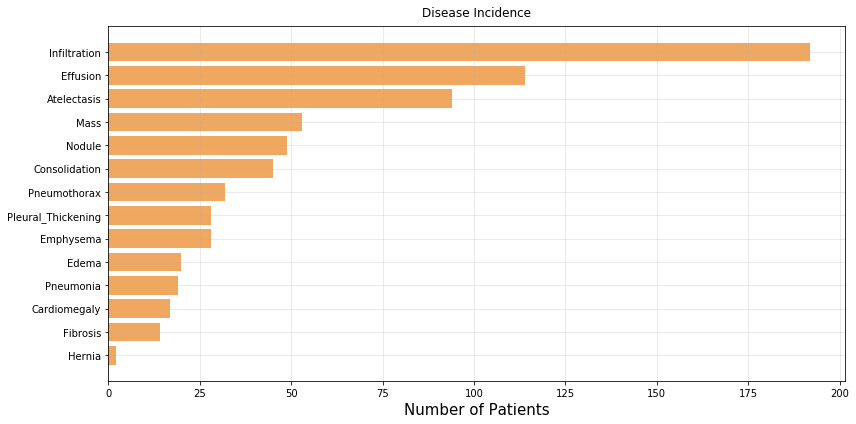

In [0]:
plt.figure(figsize=(12,6))
plt.title('Disease Incidence',
              pad=10)
plt.xlabel("Number of Patients", size=15)
plt.barh("Disease", "Count", data = df_sorted, color=(240/255, 167/255, 95/255))
plt.grid(alpha = 0.3);
plt.tight_layout()
plt.savefig("DiseaseIncidence.jpg", dpi = 500, bbox_inches='tight', pad_inches=0)

It seem like our dataset has an imbalanced population of samples. Specifically, our dataset has a small number of patients diagnosed with a `Hernia`.

<a name='3'></a>
## 2 Metrics

### 2.1 True Positives, False Positives, True Negatives, and False Negatives

The most basic statistics to compute from the model predictions are the true positives, true negatives, false positives, and false negatives. 

As the name suggests
- true positive (TP): The model classifies the example as positive, and the actual label also positive.
- false positive (FP): The model classifies the example as positive, **but** the actual label is negative.
- true negative (TN): The model classifies the example as negative, and the actual label is also negative.
- false negative (FN): The model classifies the example as negative, **but** the label is actually positive.

In [0]:
#-------------- TRUE POSITIVES --------------#
def true_positives(y, pred, th=0.5):
    TP = 0 #true positives
    thresholded_preds = pred >= th # get thresholded predictions
    TP = np.sum((y == 1) & (thresholded_preds == 1)) # compute TP
    return TP

#-------------- TRUE NEGATIVES --------------#
def true_negatives(y, pred, th=0.5):
    TN = 0 #true negatives
    thresholded_preds = pred >= th # get thresholded predictions
    TN = np.sum((y == 0) & (thresholded_preds == 0)) # compute TN
    return TN

#-------------- FALSE POSITIVES --------------#
def false_positives(y, pred, th=0.5):
    FP = 0 # false positives
    thresholded_preds = pred >= th # get thresholded predictions
    FP = np.sum((y == 0) & (thresholded_preds == 1)) # compute FP
    return FP

#-------------- FALSE NEGATIVES --------------#
def false_negatives(y, pred, th=0.5):
    FN = 0 # false negatives
    thresholded_preds = pred >= th # get thresholded predictions
    FN = np.sum((y == 1) & (thresholded_preds == 0)) # compute FN
    return FN

In [0]:
#let's create a toy dataframe
df = pd.DataFrame({'y_test': [1,1,0,0,0,0,0,0,0,1,1,1,1,1],
'preds_test': [0.8,0.7,0.4,0.3,0.2,0.5,0.6,0.7,0.8,0.1,0.2,0.3,0.4,0],
'category': ['TP','TP','TN','TN','TN','FP','FP','FP','FP','FN','FN','FN','FN','FN']
})
df # Show data

,y_test,preds_test,category
0,1,0.8,TP
1,1,0.7,TP
2,0,0.4,TN
3,0,0.3,TN
4,0,0.2,TN
5,0,0.5,FP
6,0,0.6,FP
7,0,0.7,FP
8,0,0.8,FP
9,1,0.1,FN


In [0]:
# take a look at predictions and ground truth 
y_test = df['y_test']
preds_test = df['preds_test']

threshold = 0.5

print(f"""Predicted results:
TP: {true_positives(y_test, preds_test, threshold)}
TN: {true_negatives(y_test, preds_test, threshold)}
FP: {false_positives(y_test, preds_test, threshold)}
FN: {false_negatives(y_test, preds_test, threshold)}
""")

print("Expected results:")
print(f"TP: {sum(df['category'] == 'TP')}")
print(f"TN {sum(df['category'] == 'TN')}")
print(f"FP {sum(df['category'] == 'FP')}")
print(f"FN {sum(df['category'] == 'FN')}")

Predicted results:
TP: 2
TN: 3
FP: 4
FN: 5

Expected results:
TP: 2
TN 3
FP 4
FN 5


Now it's time to take a look at our dataset: let's compute TP, TN, FP, FN for our cases:

In [0]:
#TP computation
TP=[]
for i in range(len(class_labels)):
    TP.append(true_positives(class_values[:,i], pred[:,i], 0.5))
    
#TN computation    
TN=[]
for i in range(len(class_labels)):
    TN.append(true_negatives(class_values[:,i], pred[:,i], 0.5))
   
#FP computation 
FP=[]
for i in range(len(class_labels)):
    FP.append(false_positives(class_values[:,i], pred[:,i], 0.5))
   
#FN computation 
FN=[]
for i in range(len(class_labels)):
    FN.append(false_negatives(class_values[:,i], pred[:,i], 0.5))
    
#create a results table
table=pd.DataFrame({'category' : class_labels,
'TP': TP,
'TN': TN,
'FP': FP,            
'FN': FN,            
})
table.set_index('category')

,TP,TN,FP,FN
category,,,,
Cardiomegaly,16,814,169,1
Emphysema,20,869,103,8
Effusion,99,690,196,15
Hernia,1,743,255,1
Infiltration,114,543,265,78
Mass,40,789,158,13
Nodule,28,731,220,21
Atelectasis,64,657,249,30
Pneumothorax,24,785,183,8


### 2.2 Accuracy

Accuracy measures how often our classification model makes the correct prediction:

$$accuracy = \frac{\text{true positives} + \text{true negatives}}{\text{true positives} + \text{true negatives} + \text{false positives} + \text{false negatives}}$$


In [0]:
#accuracy computation
def get_accuracy(y, pred, th=0.5):
    
    accuracy = 0.0
    
    TP = true_positives(y, pred, th = th)
    FP = false_positives(y, pred, th = th)
    TN = true_negatives(y, pred, th = th)
    FN = false_negatives(y, pred, th = th)
    
    accuracy = (TP + TN)/(TP + TN + FP + FN)  # Accuracy computation
    
    return accuracy

In [0]:
# Test
print("Test case:")

y_test = np.array([1, 0, 0, 1, 1])
print('test labels: {y_test}')

preds_test = np.array([0.8, 0.8, 0.4, 0.6, 0.3])
print(f'test predictions: {preds_test}')

threshold = 0.5
print(f"threshold: {threshold}")

print(f"computed accuracy: {get_accuracy(y_test, preds_test, threshold)}")

Test case:
test labels: {y_test}
test predictions: [0.8 0.8 0.4 0.6 0.3]
threshold: 0.5
computed accuracy: 0.6


In [0]:
# Compute accuracy for the dataset classes
acc=[]
for i in range(len(class_labels)):
    acc.append(get_accuracy(class_values[:,i], pred[:,i], 0.5))

In [0]:
#create a results table
table2=pd.DataFrame({'category' : class_labels,
'accuracy': acc          
})

table2.set_index('category')

,accuracy
category,
Cardiomegaly,0.830
Emphysema,0.889
Effusion,0.789
Hernia,0.744
Infiltration,0.657
Mass,0.829
Nodule,0.759
Atelectasis,0.721
Pneumothorax,0.809


What happens if we consider a different model, able to predict if the subject does not have Emphysema disease (i.e. the new model is a simple binary classifier)?

In [0]:
print('Emphysema disease accuracy =', get_accuracy(valid_results["Emphysema"].values, np.zeros(len(valid_results))))

Emphysema disease accuracy = 0.972


It is a great result! This model is clearly better than the first one.

### 2.3 Prevalence
Another important concept is **prevalence**:
with prevalence we can focus on the presence of a certain disease: it is, by definition, the probability to have a certain disease.

$$prevalence = \frac{1}{N} \sum_{i} y_i$$

where $y_i = 1$ when the example is 'positive' (has the disease).


In [0]:
def get_prevalence(y):
    
    prevalence = 0.0
    
    prevalence = np.sum(y)/len(y)
    
    return prevalence

In [0]:
# Test
print("Test case:\n")

y_test = np.array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1])
print(f'test labels: {y_test}')

print(f"computed prevalence: {get_prevalence(y_test)}")


Test case:

test labels: [1 0 0 1 1 0 0 0 0 1]
computed prevalence: 0.4


In [0]:
#prevalence computation for our dataset
prev=[]
for i in range(len(class_labels)):
    prev.append(get_prevalence(class_values[:,i]))
    
#create a results table
table3=pd.DataFrame({'category' : class_labels,
'prevalence': prev         
})
table3.set_index('category')

,prevalence
category,
Cardiomegaly,0.017
Emphysema,0.028
Effusion,0.114
Hernia,0.002
Infiltration,0.192
Mass,0.053
Nodule,0.049
Atelectasis,0.094
Pneumothorax,0.032


High scores indicate common diseases (e.g. Infiltration, 0.192); low scores indicate rare diseases (e.g. Hernia, 0.002)

### 2.4 Sensitivity and Specificity

**Sensitivity** is the probability that the model predicts positive if the patient have the disease: it is the proportion of examples classified as positive in a total of positive examples.

$$sensitivity = \frac{\text{true positives}}{\text{true positives} + \text{false negatives}}$$

**Specificity** is the probability that the model predicts negative for a subject without the disease: it is the proportion of examples classified as negative in a total of negative cases.

$$specificity = \frac{\text{true negatives}}{\text{true negatives} + \text{false positives}}$$

Let's calculate sensitivity and specificity for our model:

In [0]:
def get_sensitivity(y, pred, th=0.5):
   
    sensitivity = 0.0  
    
    # get TP and FN using our previously defined functions
    TP = true_positives(y, pred, th = th)
    FN = false_negatives(y, pred, th = th)

    # use TP and FN to compute sensitivity
    sensitivity = TP/(TP + FN)
    

    return sensitivity

def get_specificity(y, pred, th=0.5):
  
    specificity = 0.0
    
    
    # get TN and FP using our previously defined functions
    TN = true_negatives(y, pred, th = th)
    FP = false_positives(y, pred, th = th)
    
    # use TN and FP to compute specificity 
    specificity = TN/(TN+ FP)
    
    
    return specificity

In [0]:
# Test
print("Test case")

y_test = np.array([1, 0, 0, 1, 1])
print(f'test labels: {y_test}\n')

preds_test = np.array([0.8, 0.8, 0.4, 0.6, 0.3])
print(f'test predictions: {preds_test}\n')

threshold = 0.5
print(f"threshold: {threshold}\n")

print(f"computed sensitivity: {get_sensitivity(y_test, preds_test, threshold):.2f}")
print(f"computed specificity: {get_specificity(y_test, preds_test, threshold):.2f}")

Test case
test labels: [1 0 0 1 1]

test predictions: [0.8 0.8 0.4 0.6 0.3]

threshold: 0.5

computed sensitivity: 0.67
computed specificity: 0.50


In [0]:
# Compute accuracy for the dataset classes
sens=[]
spec=[]
for i in range(len(class_labels)):
    sens.append(get_sensitivity(class_values[:,i], pred[:,i], 0.5))
    spec.append(get_specificity(class_values[:,i], pred[:,i], 0.5))
#create a results table
table4=pd.DataFrame({'category' : class_labels,
'sensitivity': sens,
'specificity': spec         
})
table4.set_index('category')

,sensitivity,specificity
category,,
Cardiomegaly,0.941176,0.828077
Emphysema,0.714286,0.894033
Effusion,0.868421,0.778781
Hernia,0.500000,0.744489
Infiltration,0.593750,0.672030
Mass,0.754717,0.833157
Nodule,0.571429,0.768665
Atelectasis,0.680851,0.725166
Pneumothorax,0.750000,0.810950


### 2.5 PPV and NPV

Given the model predicts positive on a patient, what is the probability that he actually has the disease? This is called the positive predictive value (PPV) of a model. 

$$PPV = \frac{\text{true positives}}{\text{true positives} + \text{false positives}}$$ 

Similarly, the doctor might want to know the probability that a patient is normal, given the model prediction is negative. This is called the negative predictive value (NPV) of a model.

$$NPV = \frac{\text{true negatives}}{\text{true negatives} + \text{false negatives}}$$


Let's calculate PPV & NPV for our model:

In [0]:
#------ PPV ------#
def get_ppv(y, pred, th=0.5):
    
    PPV = 0.0

  # get TP and FP using our previously defined functions
    TP = true_positives(y, pred, th = th)
    FP = false_positives(y, pred, th = th)
  # use TP and FP to compute PPV
    PPV = TP/(TP + FP)
    
    return PPV
#------ NPV ------#
def get_npv(y, pred, th=0.5):
    
    NPV = 0.0
 
  # get TN and FN using our previously defined functions
    TN = true_negatives(y, pred, th = th)
    FN = false_negatives(y, pred, th = th)
  # use TN and FN to compute NPV
    NPV = TN/(TN + FN)

    return NPV

In [0]:
# Test
print("Test case:\n")

y_test = np.array([1, 0, 0, 1, 1])
print(f'test labels: {y_test}')

preds_test = np.array([0.8, 0.8, 0.4, 0.6, 0.3])
print(f'test predictions: {preds_test}\n')

threshold = 0.5
print(f"threshold: {threshold}\n")

print(f"computed ppv: {get_ppv(y_test, preds_test, threshold):.2f}")
print(f"computed npv: {get_npv(y_test, preds_test, threshold):.2f}")

Test case:

test labels: [1 0 0 1 1]
test predictions: [0.8 0.8 0.4 0.6 0.3]

threshold: 0.5

computed ppv: 0.67
computed npv: 0.50


In [0]:
# Compute ppv and npv for the dataset classes
ppv=[]
npv=[]
for i in range(len(class_labels)):
    ppv.append(get_ppv(class_values[:,i], pred[:,i], 0.5))
    npv.append(get_npv(class_values[:,i], pred[:,i], 0.5))
    
#create a results table
table5=pd.DataFrame({'category' : class_labels,
'PPV': ppv,
'NPV': npv         
})
table5.set_index('category')

,PPV,NPV
category,,
Cardiomegaly,0.086486,0.998773
Emphysema,0.162602,0.990878
Effusion,0.335593,0.978723
Hernia,0.003906,0.998656
Infiltration,0.300792,0.874396
Mass,0.202020,0.983791
Nodule,0.112903,0.972074
Atelectasis,0.204473,0.956332
Pneumothorax,0.115942,0.989912


### 2.6 ROC Curve

A Receiver Operating Characteristic (ROC) curve is a plot that shows us the performance of our model as its prediction threshold is varied. 

To construct a ROC curve, we plot the true positive rate (TPR) againts the false positive rate (FPR), at various threshold settings.

Let's look at this curve for our model:

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def get_ROC(y, pred, target_names):
    for i in range(len(target_names)):
        
            curve_function = roc_curve
            auc_roc = roc_auc_score(y[:, i], pred[:, i])   #auc score computation
            label = target_names[i] + " AUC: %.3f " % auc_roc
            xlabel = "False positive rate"
            ylabel = "True positive rate"
            a, b, _ = curve_function(y[:, i], pred[:, i])
            plt.figure(1, figsize=(7, 7))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.plot(a, b, label=label)
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)

            plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
                       fancybox=True, ncol=1)

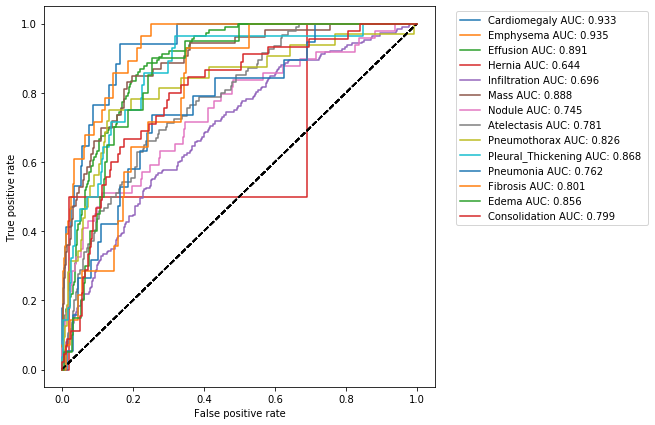

In [0]:
get_ROC(class_values, pred, class_labels)

The shape of a ROC curve, and the area under it (Area Under the Curve AUC), tell us how performant is our model: a good model is represented by a ROC curve closed to the upper left hand corner (where TPR is approximately 1 and FPR is 0) and by a AUC value of 1.

Let's use the `sklearn` metric function of `roc_auc_score` to add this score to our metrics table.

In [0]:
auc_value=[]
for i in range(len(class_labels)):
    auc_value.append(roc_auc_score(class_values[:, i], pred[:, i]))

table6=pd.DataFrame({'category' : class_labels,
'AUC': auc_value      
})
table6.set_index('category')

,AUC
category,
Cardiomegaly,0.932918
Emphysema,0.935038
Effusion,0.891331
Hernia,0.644289
Infiltration,0.695848
Mass,0.887729
Nodule,0.744823
Atelectasis,0.781034
Pneumothorax,0.826091


### 2.7 Confidence Intervals

Our dataset is only a sample of the real world, and our calculated values for all the above metrics are an estimate of real world values. Hence, it would be better to quantify this uncertainty due to the sampling of our dataset. We'll do this through the use of confidence intervals. A 95% confidence interval for an estimate 𝑠̂ of a parameter 𝑠 is an interval $I = (a, b)$ such that 95% of the time, when the experiment is run, the true value 𝑠 is contained in 𝐼

We use a method called bootstrap. The bootstrap estimates the uncertainty by resampling the dataset with replacement. For each resampling 𝑖, we will get a new estimate, 𝑠̂(i). We can then estimate the distribution of 𝑠̂ by using the distribution of 𝑠̂(i) for our bootstrap samples.

In the code below, we create bootstrap samples and compute sample AUCs from those samples. Note that we use stratified random sampling (sampling from the positive and negative classes separately) to make sure that members of each class are represented. 

In [0]:
#------ computing the intervals ------#

def bootstrap_auc(y, pred, classes, bootstraps = 100, fold_size = 1000):
    statistics = np.zeros((len(classes), bootstraps))

    for c in range(len(classes)):
        df = pd.DataFrame(columns=['y', 'pred'])
        df.loc[:, 'y'] = y[:, c]
        df.loc[:, 'pred'] = pred[:, c]
        # get positive examples for stratified sampling
        df_pos = df[df.y == 1]
        df_neg = df[df.y == 0]
        prevalence = len(df_pos) / len(df)
        for i in range(bootstraps):
            # stratified sampling of positive and negative examples
            pos_sample = df_pos.sample(n = int(fold_size * prevalence), replace=True)
            neg_sample = df_neg.sample(n = int(fold_size * (1-prevalence)), replace=True)

            y_sample = np.concatenate([pos_sample.y.values, neg_sample.y.values])
            pred_sample = np.concatenate([pos_sample.pred.values, neg_sample.pred.values])
            score = roc_auc_score(y_sample, pred_sample)
            statistics[c][i] = score
    return statistics

statistics = bootstrap_auc(class_values, pred, class_labels)

Now we can compute confidence intervals from the sample statistics that we computed.

In [0]:
#------ printing the table ------#

table7 = pd.DataFrame(columns=["Mean AUC (CI 5%-95%)"])

for i in range(len(class_labels)):
    mean = statistics.mean(axis=1)[i]
    max_ = np.quantile(statistics, .95, axis=1)[i]
    min_ = np.quantile(statistics, .05, axis=1)[i]
    table7.loc[class_labels[i]] = ["%.2f (%.2f-%.2f)" % (mean, min_, max_)]
    
table7

,Mean AUC (CI 5%-95%)
Cardiomegaly,0.94 (0.91-0.96)
Emphysema,0.94 (0.91-0.96)
Effusion,0.89 (0.87-0.92)
Hernia,0.64 (0.30-0.98)
Infiltration,0.70 (0.66-0.73)
Mass,0.88 (0.84-0.92)
Nodule,0.74 (0.68-0.81)
Atelectasis,0.78 (0.74-0.81)
Pneumothorax,0.82 (0.75-0.89)
Pleural_Thickening,0.87 (0.82-0.91)


### 2.8 Precision-Recall Curve


Precision and recall are two metrics often used together:

**Precision** is a measure of result relevancy: it quantify the ability of our model to not label a negative subject as positive. The precision score is equivalent to PPV

**Recall** is a measure of how many truly relevant results are returned: it is the probability that a positive prediction is actually positive. The recall score is equivalent to sensitivity

The **precision-recall curve** (PRC) illustrate the relationship between precision and recall for different thresholds. Let's compute it:

In [0]:
#----- PRC -----#
from sklearn.metrics import average_precision_score, precision_recall_curve

def get_PRC(y, pred, target_names):
    for i in range(len(target_names)):
            precision, recall, _ = precision_recall_curve(y[:, i], pred[:, i])
            average_precision = average_precision_score(y[:, i], pred[:, i])
            label = target_names[i] + " Avg.: %.3f " % average_precision
            plt.figure(1, figsize=(7, 7))
            plt.step(recall, precision, where='post', label=label)
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.ylim([0.0, 1.05])
            plt.xlim([0.0, 1.0])
            plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
                       fancybox=True, ncol=1)

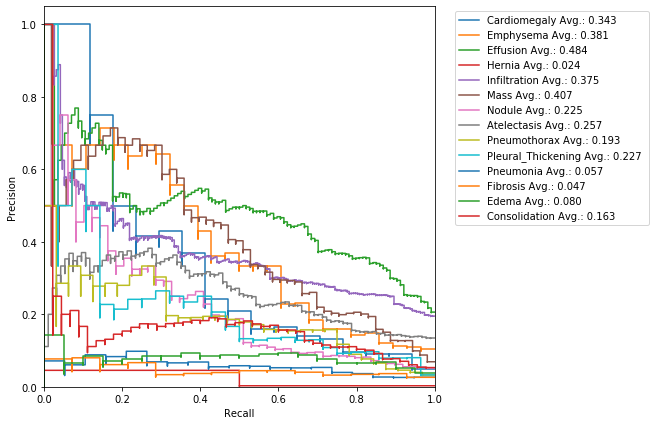

In [0]:
#----- plot the curve -----#
get_PRC(class_values, pred, class_labels)

### 2.9 F1 Score

F1-score combines precision and recall trough their armonic mean:

Let's compute it with the formula:

$$F1 score = 2 * \frac{\text{precision} * \text{recall}}{\text{precision} + \text{recall}}$$ 

In [0]:
def get_f1(y, pred, th=0.5):
  
    F1 = 0.0
    
    # get precision and recall using our previously defined functions
 
    precision=get_ppv(y, pred, th = th)
    recall=get_sensitivity(y, pred, th = th)
    
    

    # use precision and recall to compute F1
    F1 = 2 * (precision * recall) / (precision + recall)
    
    
    return F1

In [0]:
f1=[]
for i in range(len(class_labels)):
    f1.append(get_f1(class_values[:,i], pred[:,i]))
    
#create a results table
table8=pd.DataFrame({'category' : class_labels,
'F1': f1       
})
table8.set_index('category')

,F1
category,
Cardiomegaly,0.158416
Emphysema,0.264901
Effusion,0.484108
Hernia,0.007752
Infiltration,0.399299
Mass,0.318725
Nodule,0.188552
Atelectasis,0.314496
Pneumothorax,0.200837


Alternatively, we can simply use `sklearn`'s utility metric function of `f1_score` to compute this measure.

In [0]:
from sklearn.metrics import f1_score

## Final table

At this point, let's take a look at the final table, which compares results from every metric.

In [0]:
table9=pd.DataFrame({'category' : class_labels,
'TP': TP,
'TN': TN,
'FP': FP,            
'FN': FN,
'accuracy': acc,
'prevalence': prev,
'sensitivity': sens,
'specificity': spec, 
'PPV': ppv,
'NPV': npv,
'AUC': auc_value,
'Mean AUC (CI 5%-95%)' :table7['Mean AUC (CI 5%-95%)'],                  
'F1': f1       
})
table9.set_index('category')

,TP,TN,FP,FN,accuracy,prevalence,sensitivity,specificity,PPV,NPV,AUC,Mean AUC (CI 5%-95%),F1
category,,,,,,,,,,,,,
Cardiomegaly,16,814,169,1,0.830,0.017,0.941176,0.828077,0.086486,0.998773,0.932918,0.94 (0.91-0.96),0.158416
Emphysema,20,869,103,8,0.889,0.028,0.714286,0.894033,0.162602,0.990878,0.935038,0.94 (0.91-0.96),0.264901
Effusion,99,690,196,15,0.789,0.114,0.868421,0.778781,0.335593,0.978723,0.891331,0.89 (0.87-0.92),0.484108
Hernia,1,743,255,1,0.744,0.002,0.500000,0.744489,0.003906,0.998656,0.644289,0.64 (0.30-0.98),0.007752
Infiltration,114,543,265,78,0.657,0.192,0.593750,0.672030,0.300792,0.874396,0.695848,0.70 (0.66-0.73),0.399299
Mass,40,789,158,13,0.829,0.053,0.754717,0.833157,0.202020,0.983791,0.887729,0.88 (0.84-0.92),0.318725
Nodule,28,731,220,21,0.759,0.049,0.571429,0.768665,0.112903,0.972074,0.744823,0.74 (0.68-0.81),0.188552
Atelectasis,64,657,249,30,0.721,0.094,0.680851,0.725166,0.204473,0.956332,0.781034,0.78 (0.74-0.81),0.314496
Pneumothorax,24,785,183,8,0.809,0.032,0.750000,0.810950,0.115942,0.989912,0.826091,0.82 (0.75-0.89),0.200837
